<a href="https://colab.research.google.com/github/sangeetha345/Nominatium-NearestNeighbour-Route-Optimizer/blob/main/Travel_to_places_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Run the entire code and give the names of the cities**

**Import required libraries**

In [3]:
import pandas as pd
import numpy as np
import folium
from sklearn.neighbors import NearestNeighbors
import requests
import matplotlib.pyplot as plt
import imageio
import datetime
from geopy import distance
from geopy.geocoders import Nominatim
from folium import plugins

**Get the locations and create a dataframe**

In [6]:
def get_latitude_longitude(city_name):
    """
    This function retrieves latitude and longitude of a city using Nominatim API.

    Args:
        city_name (str): Name of the city.

    Returns:
        tuple: A tuple containing (latitude, longitude) or None if location not found.
    """
    geolocator = Nominatim(user_agent="TSP")  # Replace with your app name
    location = geolocator.geocode(city_name)

    if location:
        return location.latitude, location.longitude
    else:
        return None

# Example usage
print("Enter the number of cities : ")
number_of_cities = int(input())

# Create an empty DataFrame
city_df = pd.DataFrame(columns=['City', 'Latitude', 'Longitude'])

# Loop through the cities and add them to the DataFrame
for i in range(number_of_cities):
    print("Enter the name of the city : ")
    city = input()
    lat, lng = get_latitude_longitude(city)
    print("Latitude of {} is {}".format(city, lat))
    print("Longitude of {} is {}".format(city, lng))
    city_df = city_df._append({'City': city, 'Latitude': lat, 'Longitude': lng}, ignore_index=True)

# Save the DataFrame as a CSV file
city_df.to_csv('city_coordinates.csv', index=False)


Enter the number of cities : 
3
Enter the name of the city : 
Hyderabad


<ipython-input-6-19644d1a725b>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  city_df = city_df._append({'City': city, 'Latitude': lat, 'Longitude': lng}, ignore_index=True)


Latitude of Hyderabad is 17.360589
Longitude of Hyderabad is 78.4740613
Enter the name of the city : 
Goa
Latitude of Goa is 15.3004543
Longitude of Goa is 74.0855134
Enter the name of the city : 
Delhi
Latitude of Delhi is 28.6273928
Longitude of Delhi is 77.1716954


**Load the data and find the shortest tour**

In [7]:
# Step 1: Load the data
df = pd.read_csv('city_coordinates.csv')

# Step 2: Calculate pairwise distances
X = np.array(df[['Latitude', 'Longitude']])
city_names = df['City']
nbrs = NearestNeighbors(n_neighbors=len(X), algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# Step 3: Find the shortest tour
visited = np.zeros(len(X), dtype=bool)

visited[0] = True
tour = [0]
current = 0
for i in range(len(X)-1):
    unvisited_mask = np.logical_not(visited[indices[current]])
    if np.any(unvisited_mask):
        nearest = indices[current][unvisited_mask][0].item()
    else:
        nearest = None
    tour.append(nearest)
    visited[nearest] = True
    current = nearest

**Plot the cities**

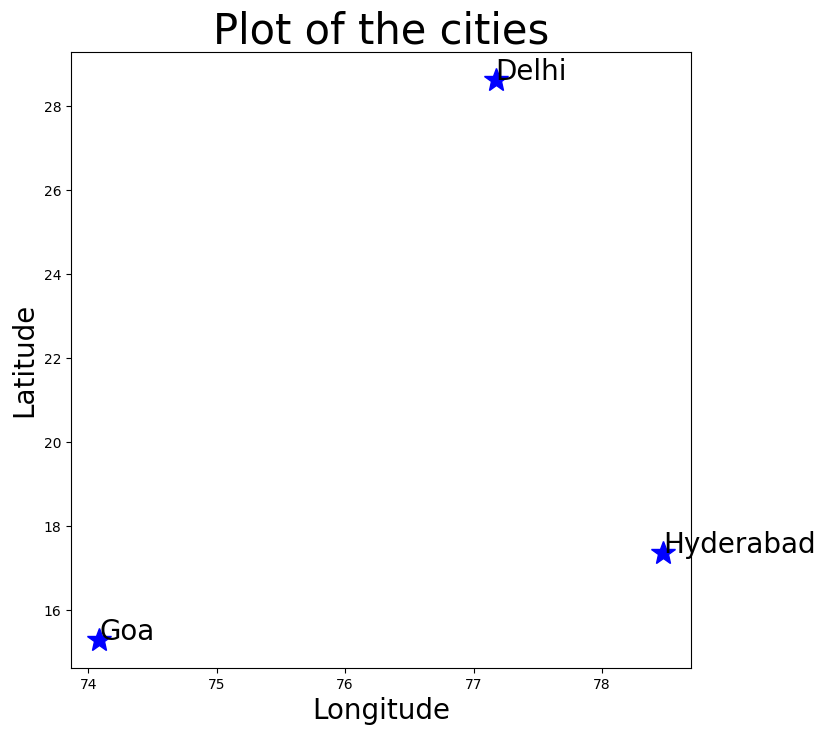

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(df['Longitude'], df['Latitude'], '*', markersize=18, color='blue')
ax.set_xlabel('Longitude',size = 20)
ax.set_ylabel('Latitude',size = 20)
ax.set_title('Plot of the cities',size = 30)
for i, name in enumerate(df['City']):
    ax.annotate(name, (df['Longitude'][i], df['Latitude'][i]), fontsize=20)

**Plot the tour and save it as a gif**

<ipython-input-9-68aad3956d10>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('tour_frame{:03d}.png'.format(i)))


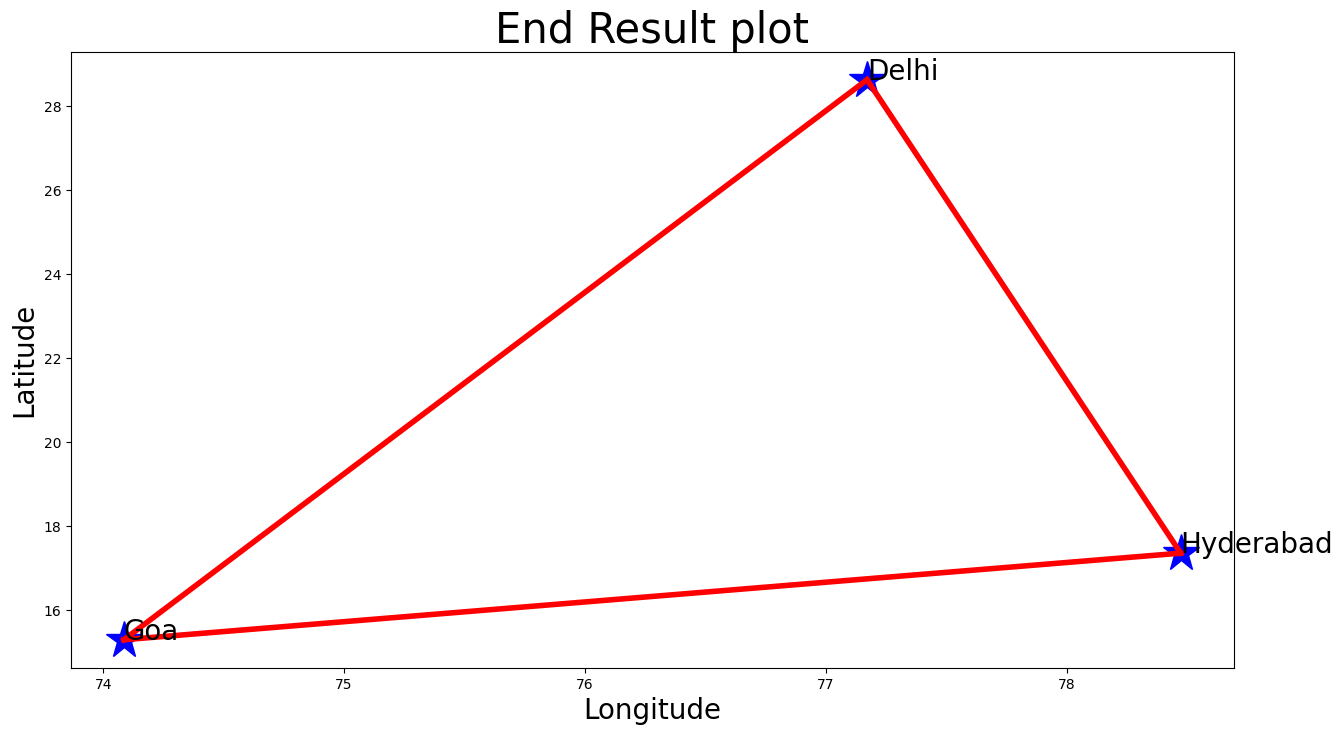

In [9]:
# Step 4: Plot the tour
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df['Longitude'], df['Latitude'], '*', markersize=28, color='blue')

for i, name in enumerate(df['City']):
    ax.annotate(name, (df['Longitude'][i], df['Latitude'][i]), fontsize=20)

for i in range(len(tour)-1):
    ax.plot([df['Longitude'][tour[i]], df['Longitude'][tour[i+1]]],
            [df['Latitude'][tour[i]], df['Latitude'][tour[i+1]]], 'r-',linewidth = 4)
    # Save the figure as an image
    plt.savefig('tour_frame{:03d}.png'.format(i))

ax.plot([df['Longitude'][tour[-1]], df['Longitude'][tour[0]]],
            [df['Latitude'][tour[-1]], df['Latitude'][tour[0]]], 'r-',linewidth = 4)
# Save the figure as an image
plt.savefig('tour_frame{:03d}.png'.format(len(tour)-1))
ax.set_xlabel('Longitude',size = 20)
ax.set_ylabel('Latitude',size = 20)
ax.set_title('End Result plot',size = 30)
# Create an animated GIF from the images
images = []
for i in range(len(tour)):
    images.append(imageio.imread('tour_frame{:03d}.png'.format(i)))
imageio.mimsave('tour_tsp.gif', images, fps=0.5)

plt.show()

**Plot the cities on a map**

In [10]:
# Step 5: Plot the cities on a map
m = folium.Map(location=[df.Latitude[0],df.Longitude[0]], zoom_start=7)

for i in range(len(tour)-1):
    coords1 = (df.iloc[tour[i]]['Latitude'], df.iloc[tour[i]]['Longitude'])
    coords2 = (df.iloc[tour[i+1]]['Latitude'], df.iloc[tour[i+1]]['Longitude'])
    folium.Marker(location=coords1).add_to(m)

coords1 = (df.iloc[tour[0]]['Latitude'], df.iloc[tour[0]]['Longitude'])
coords2 = (df.iloc[tour[-1]]['Latitude'], df.iloc[tour[-1]]['Longitude'])
folium.Marker(location=coords1).add_to(m)
folium.Marker(location=coords2).add_to(m)



m

**Animate the entire tour on a map and watch the end result**

In [11]:
# Step 4: Animate the tour on a map

m = folium.Map(location=[df.Latitude[0],df.Longitude[0]], zoom_start = 5)

for i in range(len(tour)-1):
    coords1 = (df.iloc[tour[i]]['Latitude'], df.iloc[tour[i]]['Longitude'])
    coords2 = (df.iloc[tour[i+1]]['Latitude'], df.iloc[tour[i+1]]['Longitude'])
    folium.Marker(location=coords1).add_to(m)


coords1 = (df.iloc[tour[0]]['Latitude'], df.iloc[tour[0]]['Longitude'])
coords2 = (df.iloc[tour[-1]]['Latitude'], df.iloc[tour[-1]]['Longitude'])
folium.Marker(location=coords1).add_to(m)
folium.Marker(location=coords2).add_to(m)

for i in range(len(tour)-1):
    coords1 = (df.iloc[tour[i]]['Latitude'], df.iloc[tour[i]]['Longitude'])
    coords2 = (df.iloc[tour[i+1]]['Latitude'], df.iloc[tour[i+1]]['Longitude'])
    folium.Marker(location=coords1, icon=folium.Icon(color='red')).add_to(m)
    folium.PolyLine(locations=[coords1, coords2], color='blue').add_to(m)


coords1 = (df.iloc[tour[0]]['Latitude'], df.iloc[tour[0]]['Longitude'])
coords2 = (df.iloc[tour[-1]]['Latitude'], df.iloc[tour[-1]]['Longitude'])
folium.Marker(location=coords1, icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=coords2, icon=folium.Icon(color='red')).add_to(m)
folium.PolyLine(locations=[coords1, coords2], color='blue').add_to(m)

# Open the last frame of the animation or the end result
m

**Watch the animation step by step**

In [12]:
# Step 1: Create the features list
features = []

# Set the start time
start_time = datetime.datetime.now()

# Loop through the tour
for i in range(len(tour)-1):
    # Get the travel time to the next location
#     time_minutes = df.iloc[i]['TravelTimeMinutes']
    # Get the coordinates of the start and end points
    start_coord = (df.iloc[tour[i]]['Latitude'], df.iloc[tour[i]]['Longitude'])
    end_coord = (df.iloc[tour[i+1]]['Latitude'], df.iloc[tour[i+1]]['Longitude'])

    # Calculate the distance and time to travel between the points
    dist = distance.distance(start_coord, end_coord).km
    time_hours = dist/60 # Assuming an average speed of 60 km/h
    time_minutes = int(round(time_hours*60))


    # Calculate the end time
    end_time = start_time + datetime.timedelta(minutes=time_minutes)

    # Create the feature with the actual travel time
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": [
                [df.iloc[tour[i]]['Longitude'], df.iloc[tour[i]]['Latitude']],
                [df.iloc[tour[i+1]]['Longitude'], df.iloc[tour[i+1]]['Latitude']]
            ],
        },
        "properties": {
            'style': {'color': 'red'},
            'icon': 'circle',
            'iconstyle': {
                'fillColor': '#0000FF',
                'fillOpacity': 0.8,
                'stroke': 'true',
                'radius': 10
                },
            "times": [
                start_time.strftime('%Y-%m-%dT%H:%M:%S'),
                end_time.strftime('%Y-%m-%dT%H:%M:%S')
            ]
        },
    }

    # Add the feature to the list of features
    features.append(feature)

    # Update the start time
    start_time = end_time


# Get the coordinates of the start and end points
start_coord = (df.iloc[tour[-1]]['Latitude'], df.iloc[tour[-1]]['Longitude'])
end_coord = (df.iloc[tour[0]]['Latitude'], df.iloc[tour[0]]['Longitude'])

# Calculate the distance and time to travel between the points
dist = distance.distance(start_coord, end_coord).km
time_hours = dist/60 # Assuming an average speed of 60 km/h
time_minutes = int(round(time_hours*60))


# Calculate the end time
end_time = start_time + datetime.timedelta(minutes=time_minutes)

# Create the feature with the actual travel time
feature = {
    "type": "Feature",
    "geometry": {
        "type": "LineString",
        "coordinates": [
            [df.iloc[tour[-1]]['Longitude'], df.iloc[tour[-1]]['Latitude']],
            [df.iloc[tour[0]]['Longitude'], df.iloc[tour[0]]['Latitude']]
        ],
    },
    "properties": {
       'style': {'color': 'red'},
            'icon': 'circle',
            'iconstyle': {
                'fillColor': '#0000FF',
                'fillOpacity': 0.8,
                'stroke': 'true',
                'radius': 10
                },
        "times": [
            start_time.strftime('%Y-%m-%dT%H:%M:%S'),
            end_time.strftime('%Y-%m-%dT%H:%M:%S')
        ]
    },
}

# Add the feature to the list of features
features.append(feature)



# Step 2: Create the map and add the GeoJSON object
m = folium.Map(location=[df.iloc[tour[0]]['Latitude'], df.iloc[tour[0]]['Longitude']], zoom_start=12)
for i in range(len(tour)-1):
    coords1 = (df.iloc[tour[i]]['Latitude'], df.iloc[tour[i]]['Longitude'])
    coords2 = (df.iloc[tour[i+1]]['Latitude'], df.iloc[tour[i+1]]['Longitude'])
    folium.Marker(location=coords1,icon=folium.Icon(color='black',icon_color='#FFFF00')).add_to(m)

coords1 = (df.iloc[tour[0]]['Latitude'], df.iloc[tour[0]]['Longitude'])
coords2 = (df.iloc[tour[-1]]['Latitude'], df.iloc[tour[-1]]['Longitude'])
folium.Marker(location=coords2,icon=folium.Icon(color='black',icon_color='#FFFF00')).add_to(m)
plugins.TimestampedGeoJson(
    {
        "type": "FeatureCollection",
        "features": features,



    },
    period="PT1H",
    add_last_point=True,
    loop = False
).add_to(m)


# Step 3: Save the map as an HTML file

m